# Algorithme de Deustch_Joza

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, transpile
import random as rd

Fonction qui construit le circuit quantique d'un oracle

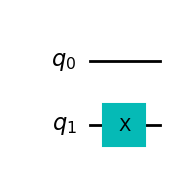

In [261]:
# Constante est vrai si la fonction est constante et fausse si la fonction est balancée
def oracle_Deustch_Joza(nb_qbits, num_fonction, constante):
    qreg = QuantumRegister(nb_qbits+1, "q")
    circuit = QuantumCircuit(qreg)

    # Si la fonction est constante créer le circuit
    if constante == True:
        if num_fonction == 1:
            circuit.x(nb_qbits)
        elif num_fonction != 0:
            print("Il y a uniquement 2 fonction constantes (0 et 1). On suppose que vous avez entré 0")

    # Si la fonction est balancée créer le circuit
    elif constante == False:
        nb_possibility = 1  #Ne pas compter les possibilitées avec une porte x
        for i in range(1, nb_qbits):
            nb_possibility *= 2
            nb_possibility += 1

        #Numéro de la fonction en binaire (les numéros commence à 1, car on veut avoir au moins un 1 dans la chaine de charactère pour avoir une porte cnot)
        if num_fonction < nb_possibility:
            bit_string = f"{num_fonction+1:0{nb_qbits}b}"

        #Si le numéro est assez grand, on applique une porte x au dernier qbit et on convertie en binaire pour savoir à quel endroit on veut appliquer les portes cnot
        elif num_fonction < nb_possibility * 2:
            circuit.x(nb_qbits)
            bit_string = f"{num_fonction+1-nb_possibility:0{nb_qbits}b}"


        #Si le numéro est trop grand
        else:
            print("Le numéro de la fonction est trop élevé")


        # On ajoute les portes cnot
        for i in range(nb_qbits):
            if bit_string[i] == "1":
                circuit.cnot(nb_qbits - 1 - i, nb_qbits)
    else :
        print("constante doit être une valeur booléenne")

    return circuit



Fonction qui construit le circuit quantique de l'algorithme

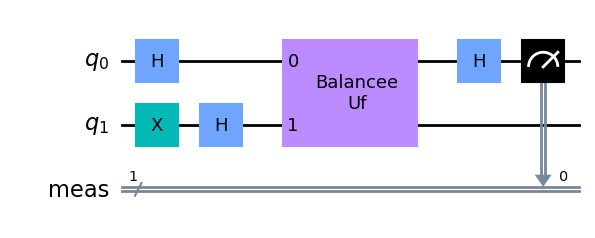

In [283]:
# Si num_fonction n'est pas entré ou est négatif, le numéro sera choisis au hasard
# Si constante(La fonction est-elle constante?) n'est pas égale à True ou False (1 ou 0), la valeur de véritée est choisie au hasard
def circuit_Deustch_Jozsa(nb_qbits, num_fonction = - 1, constante = 2):
    qreg = QuantumRegister(nb_qbits+1, "q")
    creg = ClassicalRegister(nb_qbits, "meas")
    circuit = QuantumCircuit(qreg, creg)

    if constante != True and constante !=False:
        constante = rd.randint(0, 1)

    if constante == True :
        type_fonction = "Constante"
        if num_fonction < 0:
            num_fonction = rd.randint(0, 1)
        if num_fonction > 1:
            print("Il y a uniquement 2 fonction constantes (0 et 1). On suppose que vous avez entré 0")
            num_fonction = 0
    else :
        type_fonction = "Balancee"

        # Si le numéro de la fonction est négatif, choisir le numéro au hasard parmis toute les possibilitées (avec et sans la porte x cette fois)
        if num_fonction < 0:
            nb_possibility = 1
            for i in range(1, nb_qbits):
                nb_possibility *= 2
                nb_possibility += 1
            nb_possibility *= 2
            num_fonction = rd.randint(0, nb_possibility-1)


    oracle_gate = oracle_Deustch_Joza(nb_qbits, num_fonction, constante).to_gate(label = f"{type_fonction}\nUf") # Effacer «{type_fonction}/n» si on veut cacher le fait que la fonction soit balancée ou constante

    # Ajout des portes avant l'oracle
    circuit.x(nb_qbits)
    for i in range(nb_qbits+1):
        circuit.h(i)

    # Ajout de l'oracle
    circuit.append(oracle_gate, range(0, nb_qbits+1))

    # Ajout des éléments après l'oracle
    for i in range(nb_qbits):
        circuit.h(i)
    for i in range(nb_qbits):
        circuit.measure(i, i)


    return circuit

Simulation des circuits quantiques

{'0001': 1000}


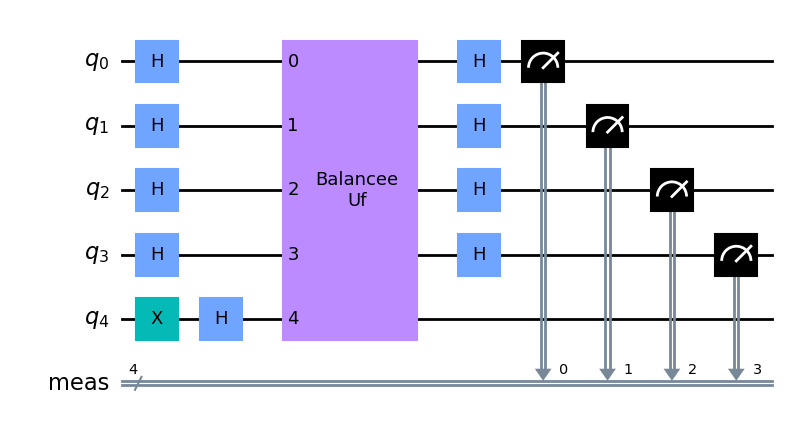

In [284]:
circuit_hasard = circuit_Deustch_Jozsa(4)

qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_hasard, qasm_simulator, shots = 1000)
counts = job.result().get_counts()
print(counts)


circuit_hasard.draw('mpl')